# Practicel ML - KNN

### Full Name : Mohammad Mowlavi
### Student Number : 

In this Notebook, we will implement KNN for the given dataset. This notebook has 3 phases, in the first phase we explore dataset, in the second phase we preprocess the dataset and in the last phase we implement KNN from scratch and also with sklearn and train it on the dataset.

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Inspect the first rows of the dataframe

In [51]:
path = '/content/drive/MyDrive/train.csv'
df = pd.read_csv(path)

In [52]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,No,Travel_Rarely,592,Research & Development,7,3,Life Sciences,1,1883,...,2,80,0,11,2,3,3,2,1,2
1,36,No,Travel_Rarely,884,Sales,1,4,Life Sciences,1,1585,...,1,80,0,15,5,3,1,0,0,0
2,34,No,Travel_Rarely,1326,Sales,3,3,Other,1,1478,...,4,80,0,15,2,3,13,9,3,12
3,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1,1965,...,1,80,0,7,5,3,7,7,0,7
4,32,No,Travel_Rarely,929,Sales,10,3,Marketing,1,722,...,4,80,0,10,2,2,10,7,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,35,No,Travel_Rarely,750,Research & Development,28,3,Life Sciences,1,1596,...,4,80,2,10,3,2,10,9,6,8
1098,41,No,Travel_Rarely,447,Research & Development,5,3,Life Sciences,1,1814,...,1,80,0,11,3,1,3,2,1,2
1099,22,Yes,Travel_Frequently,1256,Research & Development,3,4,Life Sciences,1,1203,...,2,80,1,1,5,3,0,0,0,0
1100,29,No,Travel_Rarely,1378,Research & Development,13,2,Other,1,2053,...,1,80,1,10,2,3,4,3,0,3


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1102 non-null   int64 
 1   Attrition                 1102 non-null   object
 2   BusinessTravel            1102 non-null   object
 3   DailyRate                 1102 non-null   int64 
 4   Department                1102 non-null   object
 5   DistanceFromHome          1102 non-null   int64 
 6   Education                 1102 non-null   int64 
 7   EducationField            1102 non-null   object
 8   EmployeeCount             1102 non-null   int64 
 9   EmployeeNumber            1102 non-null   int64 
 10  EnvironmentSatisfaction   1102 non-null   int64 
 11  Gender                    1102 non-null   object
 12  HourlyRate                1102 non-null   int64 
 13  JobInvolvement            1102 non-null   int64 
 14  JobLevel                

In [54]:
print(df.columns)# TODO

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


Calculate the number of samples

In [55]:
# TODO
print(len(df))

1102


Measure the number of unique values for each column. Note that Attrition is the target column.

In [56]:
# TODO
unique_values = df.nunique()
print("type of nunique:", type(unique_values))

print("number of unique values for each column:")
print(unique_values)

type of nunique: <class 'pandas.core.series.Series'>
number of unique values for each column:
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    736
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1102
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1027
MonthlyRate                 1082
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLeve

Check if there is a column with less than two unique values. If such a columns exists, remove it!

In [57]:
# TODO
df_cleaned = df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'])

print("columns after dropping:")
print(df_cleaned.columns)

columns after dropping:
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


Plot Mean BusinessTravel against Age. Note: Since the BusinessTravel column is categorical, you should first consider another column corresponding to each unique value BusinessTravel takes. For instance, you may assume that if someone does not travel, the value of the column for this person is 0.

In [88]:
# handle uniqueness
le = LabelEncoder()
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
# TODO

In [89]:
# Map the column
business_travel_means = df.groupby('Age').BusinessTravel.mean()
print("Mean Age for each BusinessTravel category:")
print(business_travel_means)
# TODO

Mean Age for each BusinessTravel category:
Age
18    1.000000
19    1.857143
20    1.800000
21    1.666667
22    1.571429
23    1.923077
24    1.352941
25    1.833333
26    1.689655
27    1.560976
28    1.583333
29    1.769231
30    1.636364
31    1.538462
32    1.511111
33    1.466667
34    1.509804
35    1.677419
36    1.543860
37    1.575758
38    1.666667
39    1.517241
40    1.625000
41    1.545455
42    1.513514
43    1.444444
44    1.750000
45    1.517241
46    1.826087
47    1.642857
48    1.714286
49    1.666667
50    1.478261
51    1.764706
52    1.733333
53    1.933333
54    1.733333
55    1.684211
56    1.800000
57    2.000000
58    1.636364
59    1.714286
60    2.000000
Name: BusinessTravel, dtype: float64


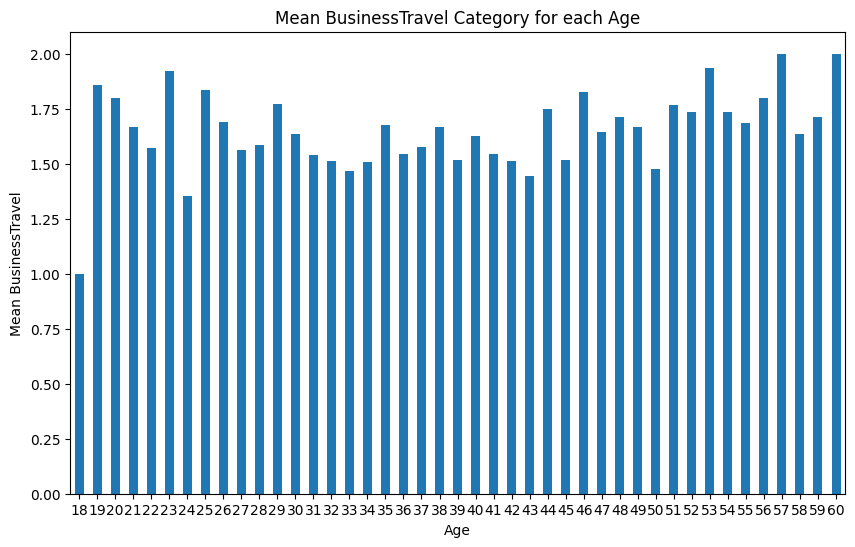

In [93]:
# plot
# TODO
business_travel_means.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Age')
plt.ylabel('Mean BusinessTravel')
plt.title('Mean BusinessTravel Category for each Age')
plt.xticks(rotation=0)
plt.show()

Check if there seems to be a meaningful relationship between people's age and the years they have worked with their current manager. Your result should be a plot.

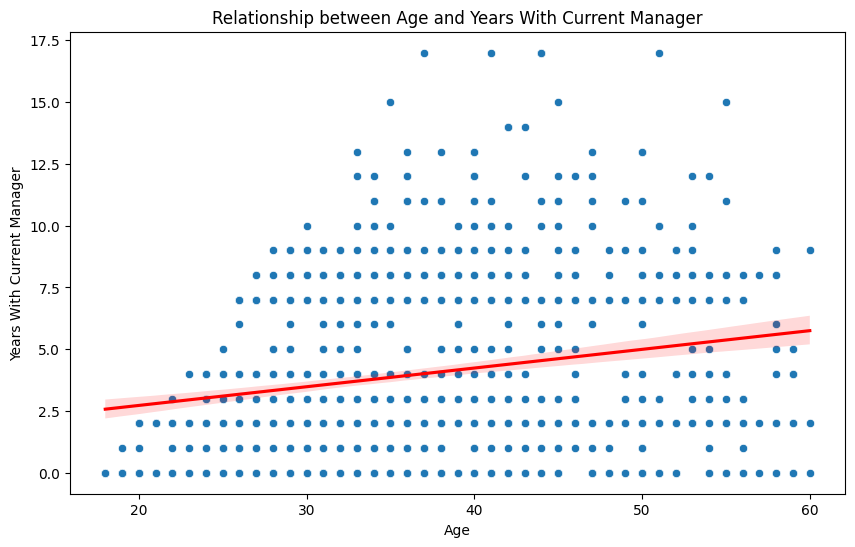

In [61]:
# TODO
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='YearsWithCurrManager', data=df)
sns.regplot(x='Age', y='YearsWithCurrManager', data=df, scatter=False, color='red')

plt.xlabel('Age')
plt.ylabel('Years With Current Manager')
plt.title('Relationship between Age and Years With Current Manager')
plt.show()


Plot the average MonthlyIncome against the YearsAtCompany.

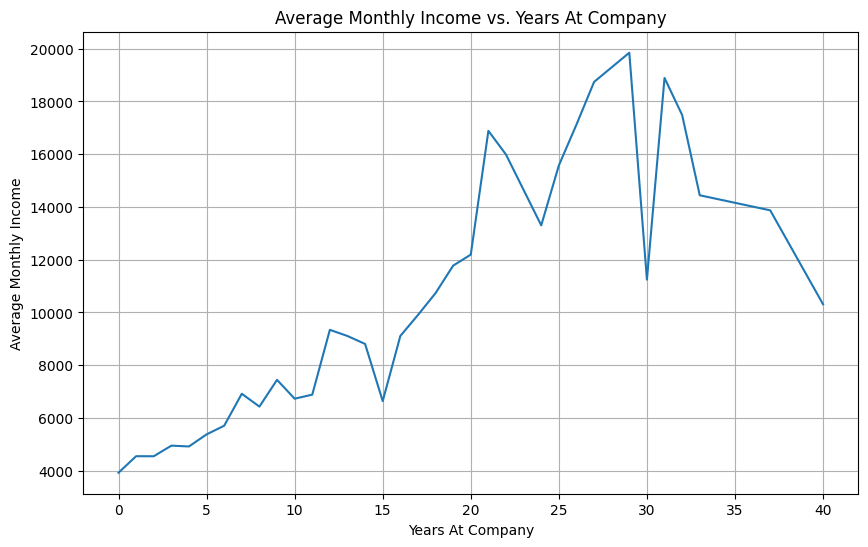

In [62]:
# TODO
mean_monthly_income = df.groupby('YearsAtCompany')['MonthlyIncome'].mean()

plt.figure(figsize=(10, 6))
mean_monthly_income.plot(kind='line')
plt.xlabel('Years At Company')
plt.ylabel('Average Monthly Income')
plt.title('Average Monthly Income vs. Years At Company')
plt.grid(True)
plt.show()

## Preprocessing

Label encode all categorical columns and split the data into train and test parts. The training part will further splitted into train and validation parts.

In [75]:
# Label encode

# TODO
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

X = df.drop(columns='Attrition')
y = df['Attrition']

In [76]:
# split into train and validation

# TODO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
# lens of train and validation datasets

# TODO
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2


In [78]:
X_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
324,30,2,501,2,27,5,2,1,747,3,...,4,80,1,10,2,2,8,7,7,7
217,26,1,1096,1,6,3,4,1,1918,3,...,1,80,1,8,3,3,7,7,7,7
729,34,1,1003,1,2,2,1,1,1140,4,...,4,80,0,5,3,2,3,2,0,2
927,31,2,1079,2,16,4,2,1,1761,1,...,1,80,3,10,2,3,1,0,0,0
713,27,2,1115,1,3,4,3,1,700,1,...,4,80,0,5,0,3,4,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,28,2,1300,1,17,2,3,1,536,3,...,4,80,1,10,2,3,10,0,1,8
125,45,2,1448,1,29,3,5,1,1465,2,...,4,80,2,10,4,4,3,1,1,2
474,27,1,1242,2,20,3,1,1,293,4,...,4,80,0,7,2,3,7,7,0,7
126,56,2,832,1,9,3,3,1,762,3,...,3,80,0,30,1,2,10,7,1,1


In [79]:
print(f"Length of training dataset: {len(X_train)}")
print(f"Length of validation dataset: {len(X_val)}")
print(f"Length of test dataset: {len(X_test)}")

Length of training dataset: 660
Length of validation dataset: 221
Length of test dataset: 221


Split the test and validation dataframe into feature and label part, Attrition columns is the target columns and rest of the columns should be treated as features. (Note that win_or_defeat column is the target column)

In [80]:
# TODO
# This part is done above.


# Model Implementation From Scratch
  



## How the algorithm works

**We calculate the euclidean distance between a new sample and all points**

**We determine the label of the sample based on the majority vote**

## Key Points:

### Euclidean Distance
**Euclidean distance is defined as the distance between two points**

**Where it's represented by this equation :
$$\sqrt{\sum\limits_{i = 0}^{m-1} (x - y)^2}$$**


In [81]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k=3):
        """
        Initialize the KNN classifier.

        Parameters:
        - k (int): Number of neighbors to consider.
        """
        self.k = k

    def fit(self, X_train, y_train):
        """
        Fit the KNN classifier to the training data.

        Parameters:
        - X_train (DataFrame): Training feature vectors.
        - y_train (Series): Training labels.
        """
        self.X_train = X_train
        self.y_train = y_train

    def euclidean_distance(self, x1, x2):
        """
        Calculate the distance between two data points.

        Parameters:
        - x1 (numpy array): First data point.
        - x2 (numpy array): Second data point.

        Returns:
        - float: Distance between x1 and x2.
        """
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X_test):
        """
        Predict labels for test data.

        Parameters:
        - X_test (DataFrame): Test feature vectors.

        Returns:
        - numpy array: Predicted labels.
        """
        return np.array([self._predict(x) for x in X_test])

    def _predict(self, x):
        """
        Predict label for a single data point.

        Parameters:
        - x (numpy array): Test data point.

        Returns:
        - int: Predicted label.
        """
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


# Evaluation
  

Define the model and train it.

In [82]:
X_train, X_test, y_train, y_test, X_val, y_val = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test), np.array(X_val), np.array(y_val)

In [83]:
# TODO
knn = KNN(k=3)
knn.fit(X_train, y_train)

Predict the y_train and y_test values.

In [84]:
# TODO
from sklearn.metrics import accuracy_score
y_train_pred = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train_Accuracy:", train_accuracy)

y_test_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test_Accuracy:", test_accuracy)


Train_Accuracy: 0.8727272727272727
Test_Accuracy: 0.755656108597285


# Sklearn Implementation
  

Define the sklearn knn model and fit to the training data

In [85]:
# TODO
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Now predict the defined model on test data and return the accuracy

In [86]:
# TODO
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.8727272727272727
Test Accuracy: 0.755656108597285


# Thank You


**Thank you for taking your time going through this notebook**

**If you have any feedback please let me know**